In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
df_X_train = pd.read_csv("data/X_train.csv", index_col="id")
df_X_train


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17797,x17798,x17799,x17800,x17801,x17802,x17803,x17804,x17805,x17806
id,,,,,,,,,,,,,,,,,,,,,
0,-13,-9,-6,-4,0,2,6,12,23,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-34,110,249,390,527,639,721,777,823,845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-34,-36,-37,-39,-41,-42,-44,-46,-48,-51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,292,298,303,310,320,336,354,377,405,419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157,179,195,210,217,222,226,228,231,233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,-247,-271,-285,-303,-334,-376,-413,-432,-443,-451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5113,62,62,61,61,61,61,61,61,61,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5114,-95,-110,-124,-131,-126,-114,-95,-67,-42,-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_X_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17797,x17798,x17799,x17800,x17801,x17802,x17803,x17804,x17805,x17806
count,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.045144,0.272034,0.500489,0.907172,1.108853,1.272230,1.480946,1.537424,1.842095,2.439906,...,229.0,224.0,219.0,215.0,210.0,205.0,203.0,200.0,198.0,197.0
std,364.896437,361.703219,359.962357,358.691551,357.733025,356.879344,355.131683,353.081434,349.763192,344.945237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-5185.000000,-4589.000000,-4442.000000,-4431.000000,-4423.000000,-4416.000000,-4410.000000,-4406.000000,-4400.000000,-4387.000000,...,229.0,224.0,219.0,215.0,210.0,205.0,203.0,200.0,198.0,197.0
25%,-90.000000,-91.000000,-92.000000,-91.000000,-90.000000,-89.000000,-89.000000,-89.000000,-90.000000,-90.000000,...,229.0,224.0,219.0,215.0,210.0,205.0,203.0,200.0,198.0,197.0
50%,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,-8.000000,-8.000000,-9.000000,-9.000000,...,229.0,224.0,219.0,215.0,210.0,205.0,203.0,200.0,198.0,197.0
75%,81.000000,79.000000,78.000000,79.000000,80.000000,81.000000,83.000000,83.000000,83.000000,84.000000,...,229.0,224.0,219.0,215.0,210.0,205.0,203.0,200.0,198.0,197.0
max,4953.000000,5133.000000,5297.000000,5392.000000,5403.000000,5367.000000,5183.000000,4997.000000,4755.000000,4430.000000,...,229.0,224.0,219.0,215.0,210.0,205.0,203.0,200.0,198.0,197.0


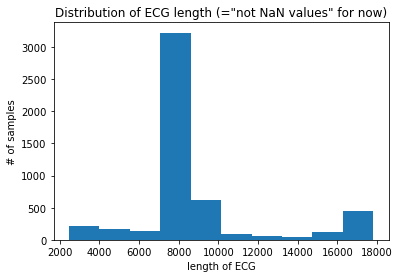

In [34]:
# TODO : check for missing values in the middle of the time series 

plt.hist(df_X_train.count(axis=1))
plt.title('Distribution of ECG length (="not NaN values" for now)')
plt.xlabel('length of ECG')
plt.ylabel('# of samples')
plt.show()

# question : seems there are 2 main clusters, is the length of the ECG signal relevant ? 
#               E.g. doctors recorded longer ECG signals for suspicious cases ?

id
3273    197.0
Name: x17806, dtype: float64


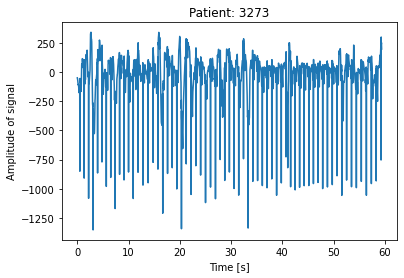

In [35]:
print(df_X_train["x17806"].dropna())

id = 3273

plt.plot(np.arange(df_X_train.shape[1])/300.0, df_X_train.iloc[id,:])
plt.title(f'Patient: {id}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude of signal')
plt.show()